## GridSerch CV

This project is a demonstration of how Grid Serch CV can be used to optimize the model to avoid overfitting and achieve better performance metrics. For the initial stage we will just use Decision Tree Classifier and then we will compare the results with the model using GridSearchCV.

In [1]:
#importing data and plotting it visualize the scatter plot

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

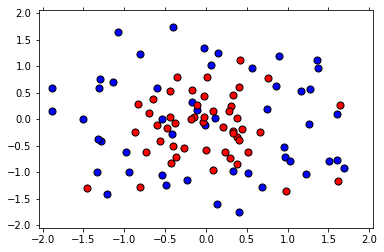

In [2]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    return X,y

X, y = load_pts('data.csv')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#split the training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier

#make an object 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#making predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)


def plot_model(X, y, model):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = model.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()


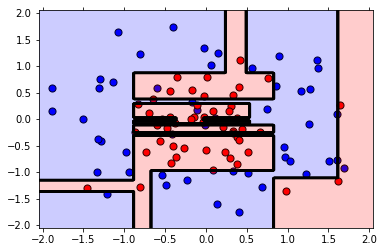

The Training F1 Score is 1.0
The Testing F1 Score is 0.6666666666666666


In [5]:
plot_model(X, y, model)
print('The Training F1 Score is', f1_score(train_pred, y_train))
print('The Testing F1 Score is', f1_score(test_pred, y_test))

## Grid Search Method:

Now we will apply the grid Serach algorithm to make the model more optimized and give better results.


The training F1 Score is 0.9069767441860465
The testing F1 Score is 0.8571428571428571


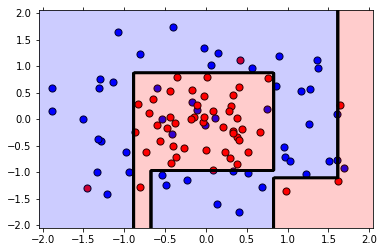

In [8]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

#assigning score method
scorer = make_scorer(f1_score)

#Parameters for grid serach object
parameters = { 'max_depth': [4,5,6,7], 'min_samples_split':[4,6,7,9,10]}

#making a grid object
grid_obj = GridSearchCV(model,parameters,scoring=scorer)

#assigning best base estimator
best_model = grid_obj.fit(X_train, y_train).best_estimator_

best_model.fit(X_train,y_train)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


print('The training F1 Score is', f1_score(y_train_pred, y_train))
print('The testing F1 Score is', f1_score(y_test_pred, y_test))


plot_model(X, y, best_model)

We can observe from the plotting above how it is drastically changed from the previous result. By using Grid search we were able to avoid overfitting of the data and hence increase the F1 score ultimately for the testing set though there was a slight decline in F1 sore of training set.